# Fordgobike trip data slide deck
## by  Yusuf Ahmed

## Investigation Overview


> In this investgation we can illustrate the bike share system how running and the type of users, we can find the duration time of all trips and with what correlate like user age or gender, so we can show this by our visulizion
## Dataset Overview

> All data In 2019, Feburary. The data provides info about the trips and stations that used in the system, also provides data about users like their type (Customer or Subscriber), members gender and the duratiuon time of trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [20]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_hour'] = df['start_time'].dt.strftime('%H').astype(int)
df['start_day_of_week'] = df['start_time'].dt.strftime('%A')
df['age']=2019-df['member_birth_year']
df['from_start_to_end']=df['start_station_id'].astype(str)+' to '+df['end_station_id'].astype(str)

In [13]:
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ['Male','Female'])
df['member_gender'] = df['member_gender'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
 

- number of trips of day's hours
- average of minutes of day's hours

In [ ]:

cat_count = df.groupby(['start_day_of_week', 'start_hour']).size().reset_index(name='count')
cat_count = cat_count.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
cat_means = df.groupby(['start_day_of_week', 'start_hour'])['duration_sec'].mean().reset_index(name='count')
cat_means = cat_means.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')/60

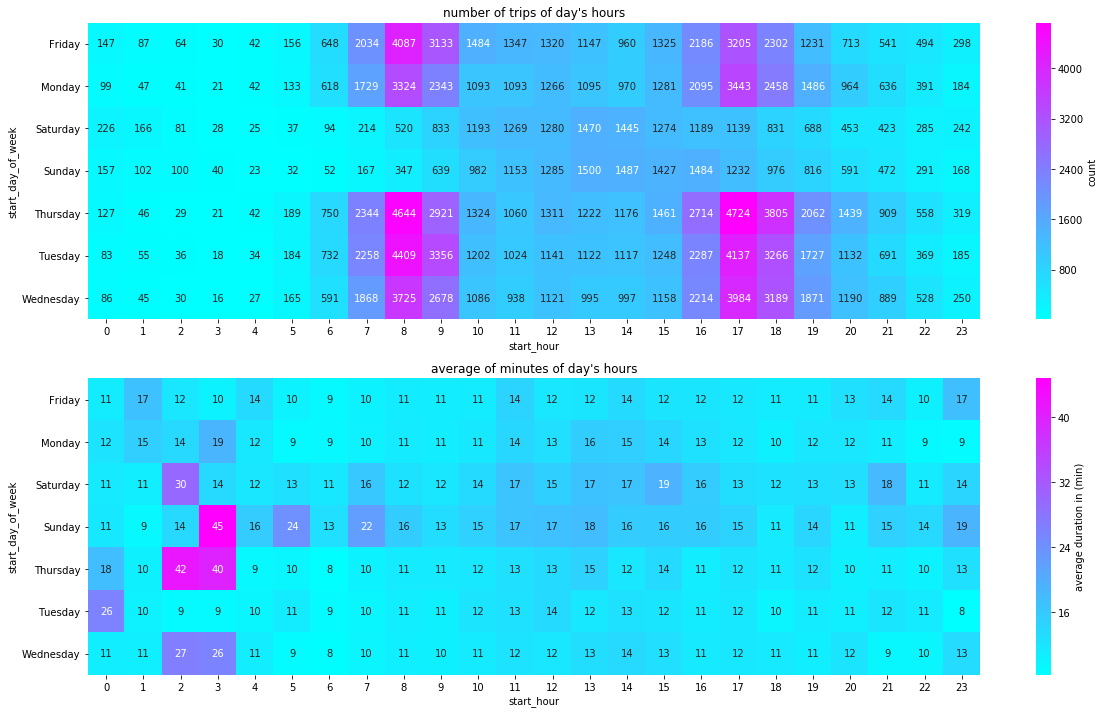

In [41]:
plt.figure(figsize=[20, 12]);
plt.subplot(2, 1, 1)
sb.heatmap(cat_count,cmap = 'cool', annot = True, fmt = 'd',cbar_kws = {'label' : 'count'});
plt.title('number of trips of day\'s hours');
plt.subplot(2, 1, 2)
sb.heatmap(cat_means,cmap = 'cool', annot = True, fmt = '0.0f',cbar_kws = {'label' : 'average duration in (min)'});
plt.title('average of minutes of day\'s hours');

## (Visualization 2)

- number of trips of member genders related to it's type
- average of minutes of member genders related to it's type

In [ ]:
ct_counts = df.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
ct_means = df.groupby(['member_gender', 'user_type'])['duration_sec'].mean().reset_index(name='count')
ct_means = ct_means.pivot(index = 'member_gender', columns = 'user_type', values = 'count')/60

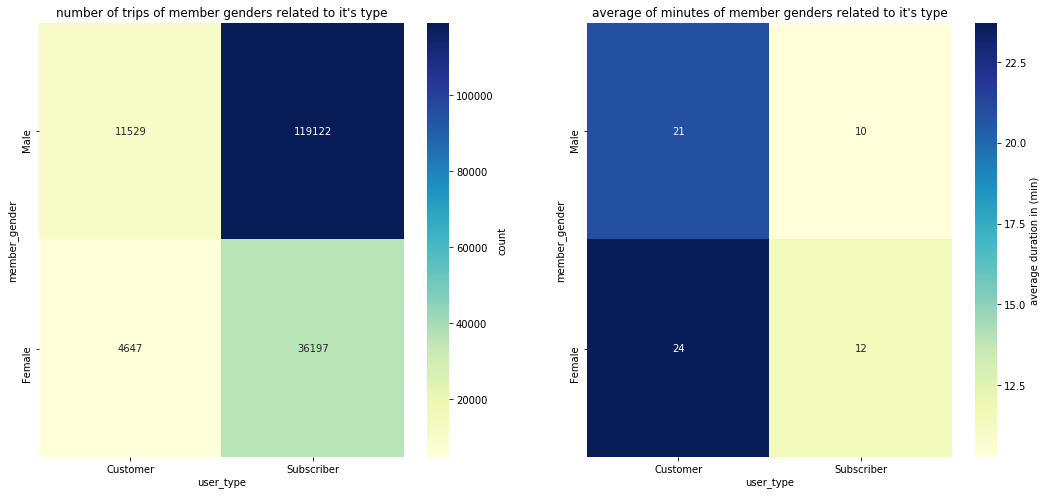

In [18]:
plt.figure(figsize=[18, 8]);
plt.subplot(1, 2, 1)
sb.heatmap(ct_counts,annot = True, fmt = 'd',cmap="YlGnBu",cbar_kws = {'label' : 'count'});
plt.title('number of trips of member genders related to it\'s type');
plt.subplot(1, 2, 2)
sb.heatmap(ct_means,annot = True, fmt = '0.0f',cmap="YlGnBu",cbar_kws = {'label' : 'average duration in (min)'});
plt.title('average of minutes of member genders related to it\'s type');

## (Visualization 3)

- average of minutes member takes between two stations

In [37]:
make_frequency = df.groupby('from_start_to_end')['duration_sec'].mean().sort_values(ascending=False)
idx = np.sum(make_frequency > 20000)
most_makes = make_frequency.index[:idx]
df_stations_sub = df.loc[df['from_start_to_end'].isin(most_makes)]
make_means = df_stations_sub.groupby('from_start_to_end').mean()
comb_order = make_means.sort_values('duration_sec', ascending = False).index

most_makes2 = make_frequency.index[:1]
df_sub = df.loc[df['from_start_to_end'].isin(most_makes2)]
largest_avg_duration=('*****'+df_sub['start_station_id'].astype(str)+' to '+df_sub['end_station_id'].astype(str)+
    ' is equal to from '+ df_sub['start_station_name'].astype(str)
     +' to '+df_sub['end_station_name'].astype(str)+' toke '
     +(df_sub['duration_sec']/60).astype(int).astype(str)+' min.'+'*****')

*****77.0 to 344.0 is equal to from 11th St at Natoma St to 16th St Depot toke 1390 min.*****


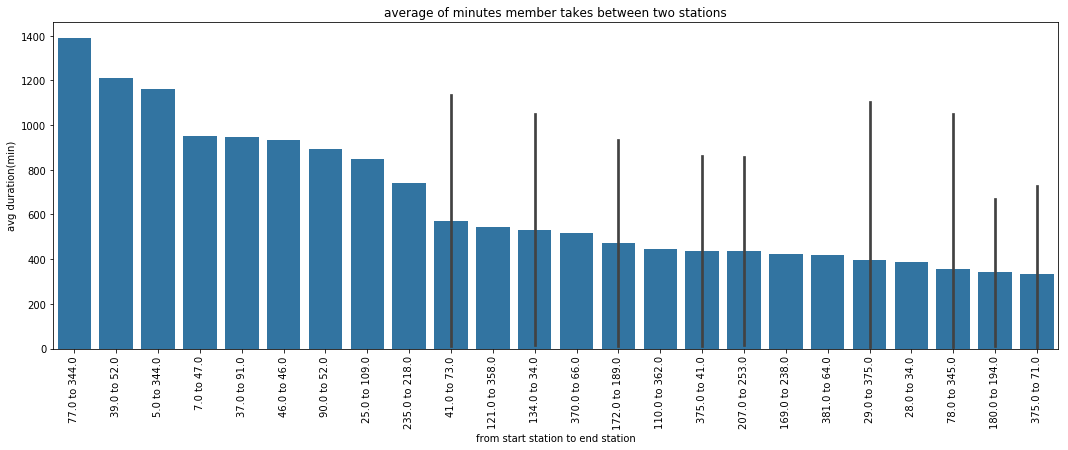

In [38]:
plt.figure(figsize=[18,6])
sb.barplot(data = df_stations_sub, x = 'from_start_to_end', y = df['duration_sec']/60,
               color = sb.color_palette()[0], order = comb_order)
plt.xticks(rotation=90);
print(ab2.astype(str).values[0])
plt.title('average of minutes member takes between two stations')
plt.ylabel('avg duration(min)');
plt.xlabel('from start station to end station');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no input --no prompt